In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Import danych

In [6]:
df = pd.read_csv('/content/laptop_price.csv', encoding='latin-1')

# Zapoznanie się z danymi

In [8]:
pd.set_option('display.max_columns', None) # wyświelenie wszystkich kolumn

In [9]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [12]:
df.info() # sprawdzamy 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [13]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


## ogólne porównanie parametrów vs cena

In [14]:
df['Company'].unique() # jakie mamy marki

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

Text(0.5, 1.0, 'Cena w zależności od marki')

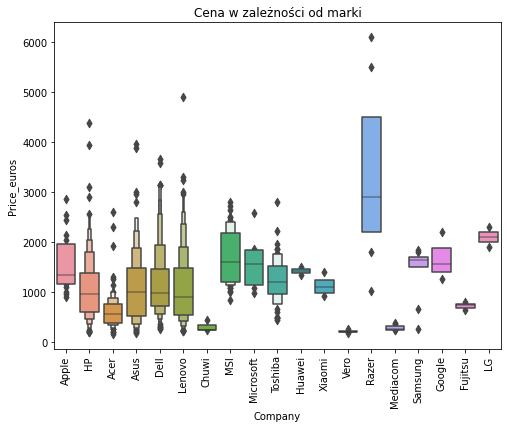

In [15]:
plt.figure(figsize=(8,6)) # porównanie marki i ceny (wykres)
g = sns.boxenplot(x='Company', y = 'Price_euros', data=df)
sns.set_theme(style="whitegrid")
g.xaxis.set_tick_params(rotation=90)
plt.title('Cena w zależności od marki')

In [16]:
df['Ram'].unique() # jaki mamy Ram

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

Text(0.5, 1.0, 'Cena w rozkładzie pamięci RAM')

<Figure size 576x432 with 0 Axes>

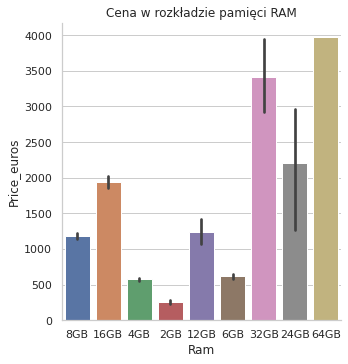

In [17]:
plt.figure(figsize=(8,6)) # porównanie Ram i ceny (wykres)
sns.catplot(x='Ram', y = 'Price_euros', kind="bar", data=df)
plt.title('Cena w rozkładzie pamięci RAM')

### zmiana zapisu dla 'Memory'

In [18]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [19]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [20]:
df["Memory"] = df["Memory"].str.replace("Flash Storage", "Flash_Storage") # łączenie Flash_Storage

print(df["Memory"])

0                 128GB SSD
1       128GB Flash_Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash_Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object


In [21]:
df["Memory"]=df['Memory'].str.replace('TB', '000GB') # zamiana TB na GB

In [22]:
df['Memory'].head(20)

0               128GB SSD
1     128GB Flash_Storage
2               256GB SSD
3               512GB SSD
4               256GB SSD
5               500GB HDD
6     256GB Flash_Storage
7     256GB Flash_Storage
8               512GB SSD
9               256GB SSD
10              500GB HDD
11              500GB HDD
12              256GB SSD
13              256GB SSD
14              256GB SSD
15              256GB SSD
16              256GB SSD
17              512GB SSD
18             1000GB HDD
19              128GB SSD
Name: Memory, dtype: object

Text(0.5, 1.0, 'Cena w rozkładzie z parametrem Memory')

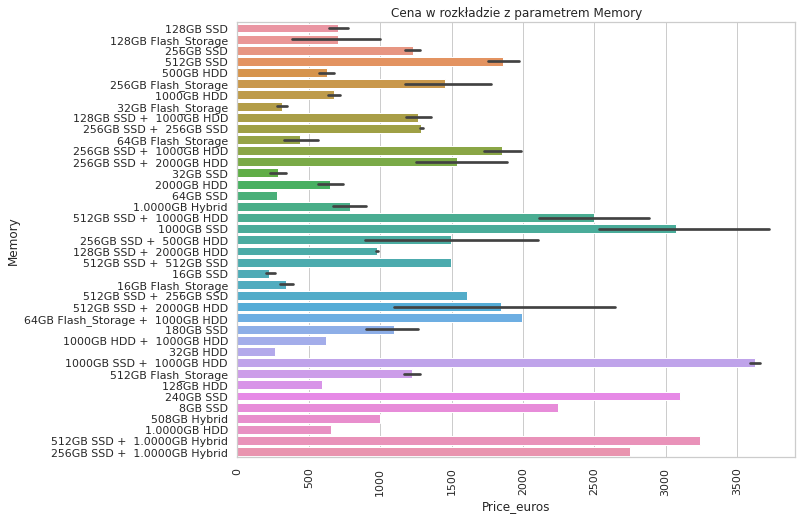

In [23]:
plt.figure(figsize=(10,8)) # wykres memory vs price
g = sns.barplot(x='Price_euros', y = 'Memory', data=df)
g.xaxis.set_tick_params(rotation=90)
plt.title('Cena w rozkładzie z parametrem Memory')

In [24]:
df["Memory"].sample(100)

150                   512GB SSD
1262                 1000GB HDD
1139                  256GB SSD
841     512GB SSD +  1000GB HDD
349                  1000GB HDD
                 ...           
595                  1000GB HDD
165     256GB SSD +  1000GB HDD
706                   256GB SSD
261                   256GB SSD
254                   256GB SSD
Name: Memory, Length: 100, dtype: object

In [28]:
df2=df["Memory"].str.split(" ", expand=True) # rozdzielenie kolumny Memory

In [26]:
df2.columns

RangeIndex(start=0, stop=6, step=1)

In [29]:
df2.drop(columns=[2], inplace=True) # usunięcie kolumny z indeksem 2

In [30]:
df2

,0,1,3,4,5
0,128GB,SSD,None,None,None
1,128GB,Flash_Storage,None,None,None
2,256GB,SSD,None,None,None
3,512GB,SSD,None,None,None
4,256GB,SSD,None,None,None
...,...,...,...,...,...
1298,128GB,SSD,None,None,None
1299,512GB,SSD,None,None,None
1300,64GB,Flash_Storage,None,None,None
1301,1000GB,HDD,None,None,None


In [31]:
df2.drop(columns=[3], inplace=True) # usunięcie kolumny z indeksem 3

In [32]:
df2

,0,1,4,5
0,128GB,SSD,None,None
1,128GB,Flash_Storage,None,None
2,256GB,SSD,None,None
3,512GB,SSD,None,None
4,256GB,SSD,None,None
...,...,...,...,...
1298,128GB,SSD,None,None
1299,512GB,SSD,None,None
1300,64GB,Flash_Storage,None,None
1301,1000GB,HDD,None,None


In [36]:
df2.rename(columns={0: 'basic_memory', 1: 'basic_memory_type', 4: 'additional_memory', 5: 'additional_memory_type'}, inplace=True) # zmiena nazw kolumn w df2

In [41]:
df2

,basic_memory,basic_memory_type,additional_memory,additional_memory_type
0,128GB,SSD,0,None
1,128GB,Flash_Storage,0,None
2,256GB,SSD,0,None
3,512GB,SSD,0,None
4,256GB,SSD,0,None
...,...,...,...,...
1298,128GB,SSD,0,None
1299,512GB,SSD,0,None
1300,64GB,Flash_Storage,0,None
1301,1000GB,HDD,0,None


In [38]:
df2['additional_memory'].fillna(0, inplace=True) # zmiana NaN na 0 w kolumnie 'additional_memory'

In [42]:
df2.head()

,basic_memory,basic_memory_type,additional_memory,additional_memory_type
0,128GB,SSD,0,None
1,128GB,Flash_Storage,0,None
2,256GB,SSD,0,None
3,512GB,SSD,0,None
4,256GB,SSD,0,None


In [43]:
df2['basic_memory'] = df2['basic_memory'].str.extract('(\d+)').astype(int) # zamiana kolumny 'basic memory' na int

In [44]:
df2

,basic_memory,basic_memory_type,additional_memory,additional_memory_type
0,128,SSD,0,None
1,128,Flash_Storage,0,None
2,256,SSD,0,None
3,512,SSD,0,None
4,256,SSD,0,None
...,...,...,...,...
1298,128,SSD,0,None
1299,512,SSD,0,None
1300,64,Flash_Storage,0,None
1301,1000,HDD,0,None


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 132.5+ KB


In [46]:
df['Ram'] = df['Ram'].str.extract('(\d+)').astype(int) # zmiana kolumny 'Ram' na intiger

AttributeError: ignored

In [49]:
df_m = pd.concat([df, df2], axis=1) # połączenie df i df2

In [ ]:
df_m

In [51]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   laptop_ID               1303 non-null   int64  
 1   Company                 1303 non-null   object 
 2   Product                 1303 non-null   object 
 3   TypeName                1303 non-null   object 
 4   Inches                  1303 non-null   float64
 5   ScreenResolution        1303 non-null   object 
 6   Cpu                     1303 non-null   object 
 7   Ram                     1303 non-null   int64  
 8   Memory                  1303 non-null   object 
 9   Gpu                     1303 non-null   object 
 10  OpSys                   1303 non-null   object 
 11  Weight                  1303 non-null   object 
 12  Price_euros             1303 non-null   float64
 13  basic_memory            1303 non-null   int64  
 14  basic_memory_type       1303 non-null   

### zmiana dtype Company na intiger

In [52]:
df['Company']

0        Apple
1        Apple
2           HP
3        Apple
4        Apple
         ...  
1298    Lenovo
1299    Lenovo
1300    Lenovo
1301        HP
1302      Asus
Name: Company, Length: 1303, dtype: object

In [53]:
le = LabelEncoder()

In [57]:
df_m['company_id'] = le.fit_transform(df_m['Company']) # kodowanie 'company_id' jako zmienną numeryczną 

In [56]:
df_m.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,basic_memory,basic_memory_type,additional_memory,additional_memory_type,company_id
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,128,SSD,0,None,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash_Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,128,Flash_Storage,0,None,1
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,256,SSD,0,None,7
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,512,SSD,0,None,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,256,SSD,0,None,1


In [58]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   laptop_ID               1303 non-null   int64  
 1   Company                 1303 non-null   object 
 2   Product                 1303 non-null   object 
 3   TypeName                1303 non-null   object 
 4   Inches                  1303 non-null   float64
 5   ScreenResolution        1303 non-null   object 
 6   Cpu                     1303 non-null   object 
 7   Ram                     1303 non-null   int64  
 8   Memory                  1303 non-null   object 
 9   Gpu                     1303 non-null   object 
 10  OpSys                   1303 non-null   object 
 11  Weight                  1303 non-null   object 
 12  Price_euros             1303 non-null   float64
 13  basic_memory            1303 non-null   int64  
 14  basic_memory_type       1303 non-null   

### zmiana dtypa Weight na intiger

In [59]:
df_m['Weight'] = df_m['Weight'].str.replace('kg','').astype(float) # usunięcie 'kg' w kolumnie 'Weight', zamiana na float

In [60]:
df_m.rename(columns={'Weight': 'Weight(KG)'}, inplace=True) # zmiana nazwy kolumny 'Weigt' na 'Weight(KG)'

In [62]:
df_m['Weight(KG)'].head()

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight(KG), dtype: float64

# korelacje miedzy zmiennymi

In [63]:
df_corr=df_m.corr()
print(df_corr)

              laptop_ID    Inches       Ram  Weight(KG)  Price_euros  \
laptop_ID      1.000000 -0.087796 -0.028607   -0.011798     0.067830   
Inches        -0.087796  1.000000  0.237993    0.827631     0.068197   
Ram           -0.028607  0.237993  1.000000    0.383874     0.743007   
Weight(KG)    -0.011798  0.827631  0.383874    1.000000     0.210370   
Price_euros    0.067830  0.068197  0.743007    0.210370     1.000000   
basic_memory  -0.025521  0.259112  0.020815    0.168803    -0.112085   
company_id     0.106702 -0.085784  0.046508   -0.129610     0.140371   

              basic_memory  company_id  
laptop_ID        -0.025521    0.106702  
Inches            0.259112   -0.085784  
Ram               0.020815    0.046508  
Weight(KG)        0.168803   -0.129610  
Price_euros      -0.112085    0.140371  
basic_memory      1.000000   -0.091841  
company_id       -0.091841    1.000000  


Text(0.5, 1.0, 'Korelacja')

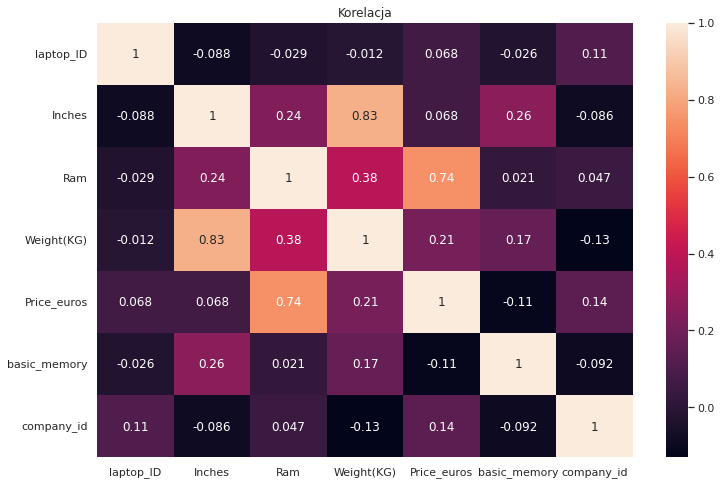

In [64]:
# sprawdzenie korelacji zmiennych
df_corr=df_m.corr()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True)
plt.title('Korelacja')

# modele predykcyjne

In [67]:
df_m.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight(KG)', 'Price_euros', 'basic_memory', 'basic_memory_type',
       'additional_memory', 'additional_memory_type', 'company_id'],
      dtype='object')

In [68]:
x = df_m[['Ram', 'basic_memory', 'company_id', 'Weight(KG)']] # zdefiniowanie zmiennej x

In [69]:
y = df_m[['Price_euros']] # zdefiniowanie zmiennej y 

In [70]:
x.head()

,Ram,basic_memory,company_id,Weight(KG)
0,8,128,1,1.37
1,8,128,1,1.34
2,8,256,7,1.86
3,16,512,1,1.83
4,8,256,1,1.37


In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [72]:
print(x_train.shape, x_test.shape)

(1042, 4) (261, 4)


# regresja liniowa

In [73]:
model_lin1 = LinearRegression()
model_lin1.fit(x_train, y_train)

LinearRegression()

In [74]:
y_pred_test = model_lin1.predict(x_test) # predykcja na zbiorze testowym

In [75]:
r2_score(y_test, y_pred_test) # obliczanie współczynnika r2 na zbiorze testowym

0.6802700690607826

In [76]:
mean_squared_error(y_test, y_pred_test) # obliczanie współczynnika MSE na zbiorze testowym

212239.27103492012

In [77]:
y_pred_train = model_lin1.predict(x_train) # predykcja na x_train

In [79]:
mean_squared_error(y_train, y_pred_train ) # obliczanie współczynnika MSE na zbiorze treningowym

204689.33615298875

In [80]:
model_lin1.coef_ # współczynniki dla zmiennych

array([[ 99.36782921,  -0.26452772,  14.52803332, -32.41238896]])

In [81]:
model_lin1.intercept_ # współczynniki dla wyrazu wolnego

array([374.16171066])

# drzewo decyzyjne

In [83]:
from sklearn import tree # import pakietów
from sklearn.tree import DecisionTreeRegressor

In [84]:
model_tree=DecisionTreeRegressor() # model regresji na zbiorze treningowym
model_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [85]:
y_pred_test=model_tree.predict(x_test) # predykcja na zbiorze testowym

In [87]:
r2_score(y_test, y_pred_test) #  obliczanie współczynnika r2

0.7344630582247609

In [88]:
mean_squared_error(y_test, y_pred_test) # obliczanie współczynnika MSE na zbiorze testowym

176265.53381995583

In [90]:
model_tree.get_depth() # sprawdzenie głębokości drzewa

22

In [92]:
model_tree.get_n_leaves() # sprawdzenie ile liści

647

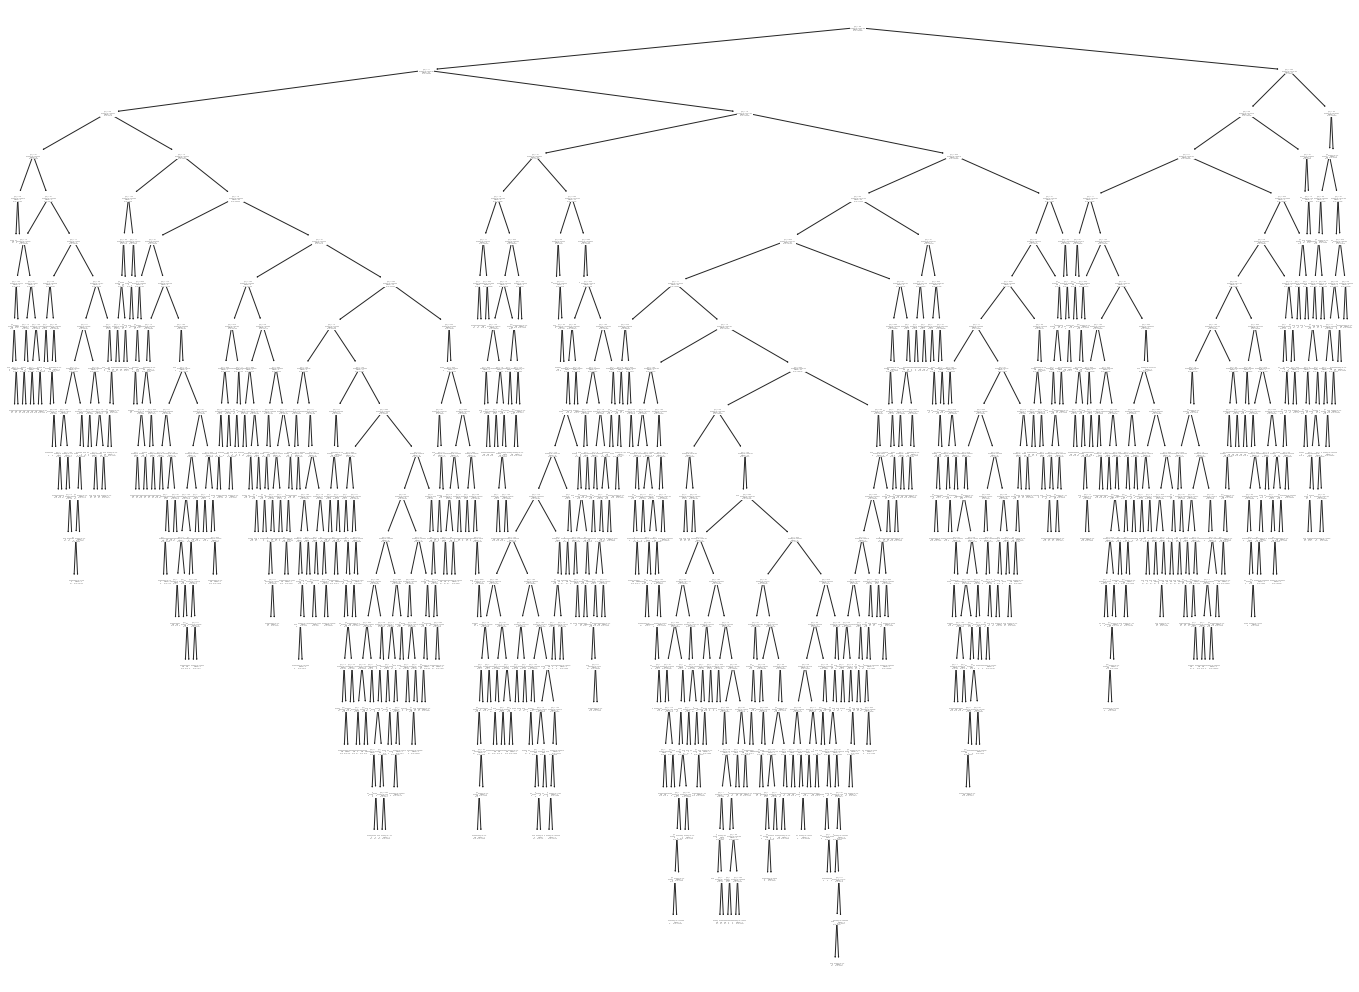

In [93]:
fit, ax=plt.subplots(figsize=(24,18))
ax=tree.plot_tree(model_tree)
plt.show()

# wartosc zmiennych w modelu

In [94]:
feat_dict={}
for importance, name in sorted(zip(model_tree.feature_importances_, x_train.columns), reverse=True):
  feat_dict[name]=importance

In [96]:
feat_dict # które kolumny i jak wpływają na model

{'Ram': 0.5581378385161497,
 'Weight(KG)': 0.261956641835061,
 'company_id': 0.10027012276015736,
 'basic_memory': 0.07963539688863187}

In [97]:
feat_df=pd.DataFrame({'Feature':feat_dict.keys(), 'Importance':feat_dict.values()})

In [98]:
feat_df # # które kolumny i jak wpływają na model

,Feature,Importance
0,Ram,0.558138
1,Weight(KG),0.261957
2,company_id,0.100270
3,basic_memory,0.079635


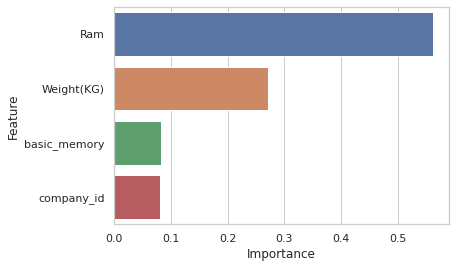

In [ ]:
sns.barplot(x='Importance', y='Feature', data=feat_df) # jak dane zmienne wpływają na wynik modelu 

In [ ]:
# Najwększy wpływ na cene laptopów mają: ilość pamięci RAM i waga laptopa